In [ ]:
!pip install pysiology

In [ ]:
from google.colab import files
files.upload()

In [3]:
#@title Fix
import os,shutil
os.remove("/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py")
shutil.move("/content/electromyography.py","/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py")

'/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py'

In [ ]:
! wget -r -N -c -np https://physionet.org/files/gaitndd/1.0.0/

In [5]:
import pysiology
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore. https://doi.org/10.1007/978-981-13-8950-4_35


In [7]:


#EDA
from collections import Counter
# import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# from mlxtend.classifier import StackingCVClassifier

In [38]:
data_1 = pd.read_csv("physionet.org/files/gaitndd/1.0.0/als1.ts",delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])

data_1.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10
1,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25
2,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74
3,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59
4,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13


In [ ]:
dataset_path = "physionet.org/files/gaitndd/1.0.0"
dict_data = {'MNF': [], 'MDF': [],'PeakFrequency': [], 'MNP': [],'TTP': [], 'SM1': [],'SM2': [], 'SM3': []
  ,'FR': [], 'PSR': [], 'VCF': [],'IEMG': [], 'MAV': [], 'MAV1': [], 
 'MAV2': [], 'SSI': [], 'VAR': [], 'TM3': [], 'TM4': [], 'TM5': [],  
 'LOG': [], 'RMS': [], 'WL': [], 'AAC': [], 'DASDV': [], 'ZC': [], 'MYOP':[],   
 'WAMP': [], 'SSC': [], 'MAVSLPk1':[],"MAVSLPk2":[],"MAVSLPk3":[],"label":[]}
  
folders = [os.path.join(dataset_path, folder_name) for folder_name in os.listdir(dataset_path) if str(folder_name).endswith(".ts")]  
  
labels = ["als","control","hunt","park"]
for folder in folders:  
  if(re.split("\d", str(folder.split("/")[4]))[0] != "example"):
    df = pd.read_csv(folder,delimiter="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)",  
                                                      "Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",  
                                                      "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)",  
                                                      "Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])
    target = ["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)","Right Swing Interval (sec)",
              "Left Stance Interval (sec)","Right Stance Interval (sec)","Double Support Interval (sec)"] 
    label = labels.index(re.split("\d", str(folder.split("/")[4]))[0]) 
    for f in target:
      data = df[f]
      analyzedEMG = pysiology.electromyography.analyzeEMGnew(data,samplerate=200,preprocessing=False) 
      time,freq = analyzedEMG

      freq = analyzedEMG[freq]
      keys1 = list(freq.keys())

      for i in keys1 :
        dict_data[i].append(freq[i])

      time = analyzedEMG[time]
      keys2 = list(time.keys())[:-1]

      for i in keys2 :
        dict_data[i].append(time[i])

      dict_data["MAVSLPk1"].append(time["MAVSLPk"][0])
      dict_data["MAVSLPk2"].append(time["MAVSLPk"][1])
      dict_data["MAVSLPk3"].append(time["MAVSLPk"][2])
      dict_data["label"].append(label)

dataFrame = pd.DataFrame(dict_data)

In [44]:
dataFrame

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,...,AAC,DASDV,ZC,MYOP,WAMP,SSC,MAVSLPk1,MAVSLPk2,MAVSLPk3,label
0,1.045189,1.739130,0.869565,27.828124,3228.062361,3373.936673,7.770359e+06,2.288863e+10,inf,321.266842,...,1.205507,4.457314,0,1.0,0,0,60.510833,162.095264,258.238116,3
1,50.688019,50.434783,88.695652,0.082625,9.584550,485.821872,6.511311e+01,1.052116e+01,inf,0.330550,...,0.470225,6.034901,0,1.0,104,143,1.144341,1.437237,1.052937,3
2,51.334036,52.173913,88.695652,0.052295,6.066233,311.404218,2.296791e+01,1.973135e+00,inf,0.357281,...,0.350229,4.108979,0,1.0,102,130,1.157938,1.237678,1.052803,3
3,38.331397,36.521739,0.869565,0.000090,0.010418,0.399342,4.148242e-05,7.079977e-09,inf,0.629651,...,0.039819,0.005382,0,1.0,100,147,0.299475,0.276884,0.347145,3
4,17.962091,5.217391,0.869565,0.000043,0.004954,0.088982,5.229765e-06,2.339726e-09,inf,2.200647,...,0.032683,0.001754,0,1.0,95,136,0.256013,0.211404,0.288988,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,37.768793,35.156250,35.937500,0.000002,0.000289,0.010927,3.965029e-08,2.510820e-13,inf,0.560455,...,0.013125,0.000460,0,1.0,75,156,0.372247,0.375252,0.371663,1
508,38.985022,34.375000,7.031250,0.000003,0.000446,0.017404,8.281384e-08,5.690941e-13,inf,0.456972,...,0.013123,0.000403,0,1.0,79,144,0.362432,0.364134,0.362900,1
509,27.854100,18.750000,3.125000,0.000016,0.002074,0.057767,1.422571e-06,1.049656e-10,inf,0.804900,...,0.019181,0.001587,0,1.0,86,149,0.622354,0.629201,0.636517,1
510,21.430488,11.718750,3.906250,0.000011,0.001379,0.029553,7.446584e-07,7.117772e-11,inf,1.235178,...,0.016726,0.000617,0,1.0,85,142,0.632021,0.640395,0.644932,1


In [47]:
dataFrame.iloc[:60,:16]

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF,IEMG,MAV,MAV1,MAV2,SSI
0,1.045189,1.739130,0.869565,27.828124,3228.062361,3373.936673,7.770359e+06,2.288863e+10,inf,321.266842,2406.035354,37141.6802,161.485566,121.271508,56.753602,7.688651e+06
1,50.688019,50.434783,88.695652,0.082625,9.584550,485.821872,6.511311e+01,1.052116e+01,inf,0.330550,-2562.481679,278.2365,1.209724,0.953195,0.696130,1.021666e+03
2,51.334036,52.173913,88.695652,0.052295,6.066233,311.404218,2.296791e+01,1.973135e+00,inf,0.357281,-2631.397101,264.1065,1.148289,0.891420,0.633940,7.618337e+02
3,38.331397,36.521739,0.869565,0.000090,0.010418,0.399342,4.148242e-05,7.079977e-09,inf,0.629651,-1469.292017,70.8096,0.307868,0.226882,0.143173,2.275035e+01
4,17.962091,5.217391,0.869565,0.000043,0.004954,0.088982,5.229765e-06,2.339726e-09,inf,2.200647,-322.635640,58.0334,0.252319,0.183159,0.112485,1.519675e+01
5,50.151855,50.434783,88.695652,0.080637,9.353861,469.113504,6.088010e+01,9.530049e+00,inf,0.328825,-2508.700045,207.4260,0.901852,0.726309,0.552955,8.580165e+02
6,51.054282,50.434783,88.695652,0.052662,6.108807,311.880774,2.305594e+01,1.983509e+00,inf,0.356821,-2602.765465,206.0731,0.895970,0.708260,0.521453,6.477702e+02
7,49.648682,49.565217,22.608696,0.081822,9.491364,471.233734,6.163696e+01,9.737951e+00,inf,0.451643,-2458.497637,149.3938,0.649538,0.543153,0.440472,7.791679e+02
8,0.934730,1.777778,0.888889,19.464857,2199.528817,2055.965846,3.914423e+06,8.165206e+09,inf,100009.168219,1778.790777,37056.2798,164.694577,123.417044,59.709812,7.519733e+06
9,26.526327,14.222222,0.888889,0.000096,0.010896,0.289027,4.003691e-05,1.105726e-08,inf,0.947474,-703.642361,277.3500,1.232667,0.918437,0.616656,3.442980e+02


In [48]:
dataFrame.iloc[:60,16:]

,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,ZC,MYOP,WAMP,SSC,MAVSLPk1,MAVSLPk2,MAVSLPk3,label
0,33574.896723,7.750019e+06,1.904022e+09,4.842861e+11,1.356095e+70,182.835770,277.2666,1.205507,4.457314,0,1.0,0,0,60.510833,162.095264,258.238116,3
1,4.461423,5.781148e+01,9.669477e+02,1.671304e+04,3.352559e+00,2.107611,108.1517,0.470225,6.034901,0,1.0,104,143,1.144341,1.437237,1.052937,3
2,3.326785,3.819383e+01,6.304287e+02,1.095847e+04,3.152794e+00,1.819978,80.5526,0.350229,4.108979,0,1.0,102,130,1.157938,1.237678,1.052803,3
3,0.099347,3.363752e-02,1.255691e-02,5.467760e-03,1.360521e+00,0.314507,9.1584,0.039819,0.005382,0,1.0,100,147,0.299475,0.276884,0.347145,3
4,0.066361,1.783326e-02,4.936528e-03,1.396612e-03,1.287007e+00,0.257046,7.5172,0.032683,0.001754,0,1.0,95,136,0.256013,0.211404,0.288988,3
5,3.746797,5.241465e+01,8.601191e+02,1.443192e+04,2.464163e+00,1.931452,103.8505,0.451524,5.831483,0,1.0,107,148,0.844868,1.160347,0.705784,3
6,2.828691,3.635519e+01,6.023219e+02,1.036828e+04,2.449711e+00,1.678211,81.3576,0.353729,4.115537,0,1.0,106,148,0.901930,1.026271,0.763813,3
7,3.402480,5.087285e+01,8.327591e+02,1.387823e+04,1.914657e+00,1.840567,104.6328,0.454925,5.847273,0,1.0,98,143,0.588863,0.948949,0.416800,3
8,33570.238645,7.558872e+06,1.820076e+09,4.562339e+11,3.356958e+71,182.814216,275.8800,1.226133,1.527398,0,1.0,0,0,72.780665,165.481776,255.821289,2
9,1.537045,1.914214e+00,2.414738e+00,3.074256e+00,3.430365e+00,1.237018,15.5202,0.068979,0.008989,0,1.0,103,144,1.312351,1.192889,1.192760,2


In [ ]:
dataFrame.columns

Index(['MNF', 'MDF', 'PeakFrequency', 'MNP', 'TTP', 'SM1', 'SM2', 'SM3', 'FR',
       'PSR', 'VCF', 'IEMG', 'MAV', 'MAV1', 'MAV2', 'SSI', 'VAR', 'TM3', 'TM4',
       'TM5', 'LOG', 'RMS', 'WL', 'AAC', 'DASDV', 'ZC', 'MYOP', 'WAMP', 'SSC',
       'MAVSLPk1', 'MAVSLPk2', 'MAVSLPk3', 'label'],
      dtype='object')

In [22]:
dataFrame =  dataFrame.drop(columns='FR')
dataFrame =  dataFrame.drop(columns='ZC')

In [ ]:
!pip -q install dataprep

In [ ]:

from dataprep.eda import plot, plot_correlation, plot_missing,create_db_report,create_report
report = create_report(dataFrame)
report

In [ ]:
dataFrame["label"].unique()

array([1, 2, 3, 0])

In [33]:
  als = dataFrame[dataFrame.label == 0]
  control = dataFrame[dataFrame.label==1]
  hunt = dataFrame[dataFrame.label==2]
  park = dataFrame[dataFrame.label==3]

In [34]:
def plot_scatter(x,y):
  fig, ax = plt.subplots()
  fig.set_size_inches(13, 7) 
  # lables and scatter points
  ax.scatter(als[x], als[y], label="als", facecolor="blue")
  ax.scatter(control[x], control[y], label="control", facecolor="green")
  ax.scatter(hunt[x], hunt[y], label="hunt", facecolor="red")
  ax.scatter(park[x], park[y], label="park", facecolor="Yellow")
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.grid()
  ax.set_title("")
  ax.legend()

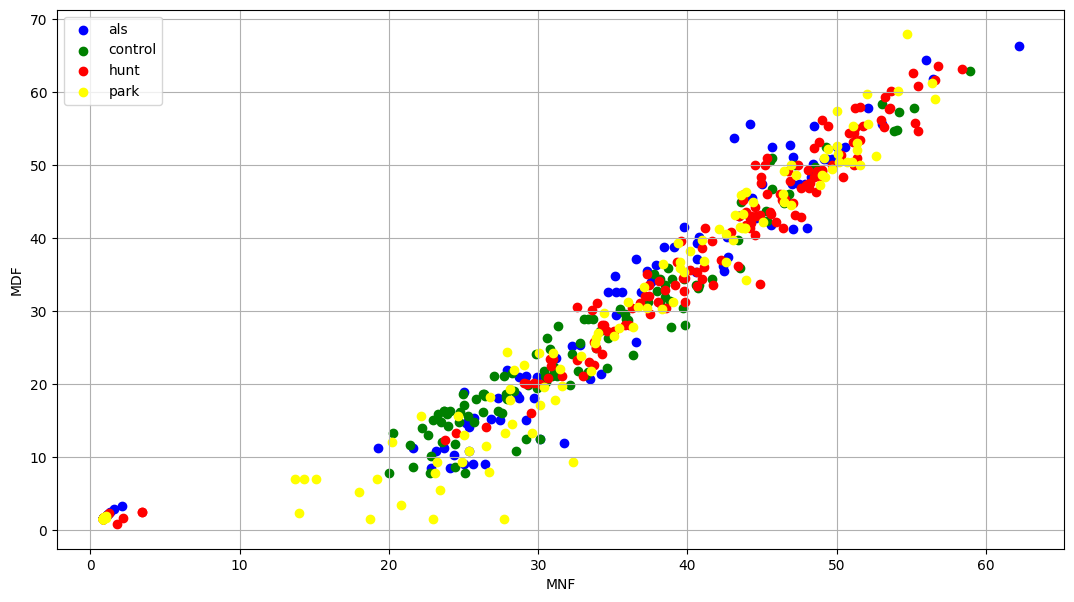

In [35]:
plot_scatter('MNF', 'MDF')

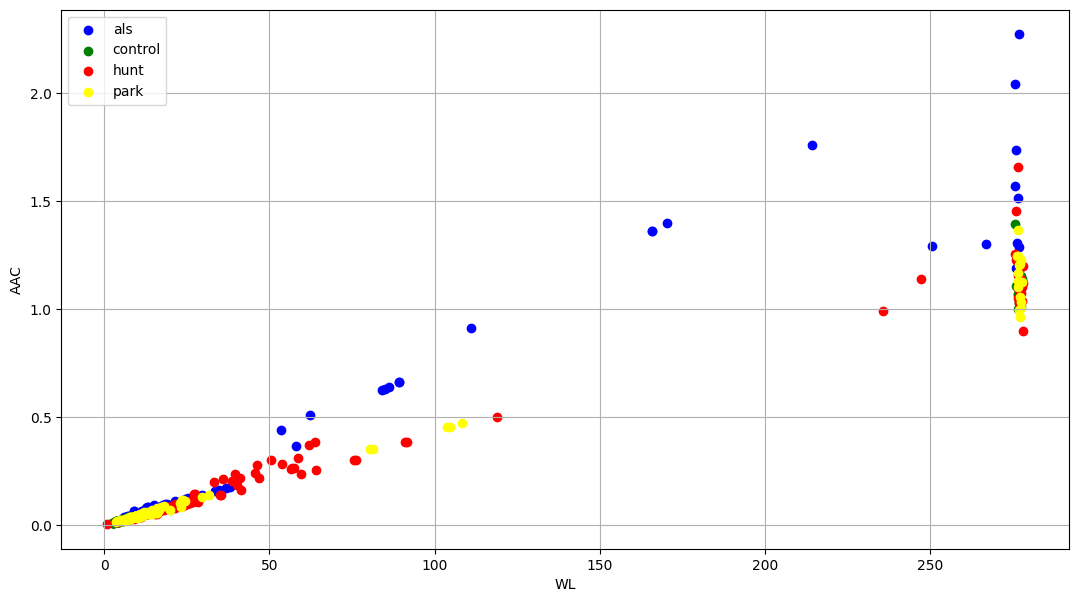

In [36]:
plot_scatter('WL', 'AAC')

In [ ]:
# plt.figure(figsize=(50,50))
# sns.heatmap(dataFrame.corr())

In [ ]:
data.describe()

count    277.000000
mean       0.262962
std        0.031523
min        0.210000
25%        0.243300
50%        0.256700
75%        0.280000
max        0.413300
Name: Double Support Interval (sec), dtype: float64

# train model

In [23]:
from sklearn.model_selection import train_test_split

# Set up X and y variables
y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('int64')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("shape of X_train data: ", X_train.shape)
print("shape of y_train data: ", y_train.shape)
print("shape of X_test data: ", X_test.shape)
print("shape of y_test data: ", y_test.shape)

shape of X_train data:  (409, 30)
shape of y_train data:  (409,)
shape of X_test data:  (103, 30)
shape of y_test data:  (103,)


## LogisticRegression

In [24]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 0  0  3 19]
 [ 0  0  4 21]
 [ 0  0  2 27]
 [ 0  0  5 22]]


Accuracy of Logistic Regression: 23.300970873786408 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        25
           2       0.14      0.07      0.09        29
           3       0.25      0.81      0.38        27

    accuracy                           0.23       103
   macro avg       0.10      0.22      0.12       103
weighted avg       0.11      0.23      0.13       103



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [25]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[ 0  0 22  0]
 [ 0  0 25  0]
 [ 0  0 29  0]
 [ 0  0 27  0]]


Accuracy of Naive Bayes model: 28.155339805825243 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        25
           2       0.28      1.00      0.44        29
           3       0.00      0.00      0.00        27

    accuracy                           0.28       103
   macro avg       0.07      0.25      0.11       103
weighted avg       0.08      0.28      0.12       103



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  Support Vector Machine

In [26]:
m3 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 0  0 22  0]
 [ 0  0 25  0]
 [ 0  0 29  0]
 [ 0  0 27  0]]


Accuracy of Support Vector Classifier: 28.155339805825243 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        25
           2       0.28      1.00      0.44        29
           3       0.00      0.00      0.00        27

    accuracy                           0.28       103
   macro avg       0.07      0.25      0.11       103
weighted avg       0.08      0.28      0.12       103



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTreeClassifier

In [27]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[16  3  2  1]
 [ 5 17  2  1]
 [ 2  3 22  2]
 [ 1  6 13  7]]


Accuracy of DecisionTreeClassifier: 60.19417475728155 

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        22
           1       0.59      0.68      0.63        25
           2       0.56      0.76      0.65        29
           3       0.64      0.26      0.37        27

    accuracy                           0.60       103
   macro avg       0.61      0.61      0.59       103
weighted avg       0.61      0.60      0.58       103



## RandomForestClassifier

In [28]:
m5 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[16  3  2  1]
 [ 1 19  4  1]
 [ 3  3 18  5]
 [ 1  4 14  8]]


Accuracy of Random Forest: 59.22330097087378 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.66      0.76      0.70        25
           2       0.47      0.62      0.54        29
           3       0.53      0.30      0.38        27

    accuracy                           0.59       103
   macro avg       0.61      0.60      0.59       103
weighted avg       0.59      0.59      0.58       103



## KNeighborsClassifier

In [29]:
m6 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[ 6  7  7  2]
 [ 2 17  5  1]
 [ 1  8 16  4]
 [ 3 11  8  5]]


Accuracy of K-NeighborsClassifier: 42.71844660194174 

              precision    recall  f1-score   support

           0       0.50      0.27      0.35        22
           1       0.40      0.68      0.50        25
           2       0.44      0.55      0.49        29
           3       0.42      0.19      0.26        27

    accuracy                           0.43       103
   macro avg       0.44      0.42      0.40       103
weighted avg       0.44      0.43      0.40       103



## Extreme Gradient Boost

In [30]:
m7 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[12  5  2  3]
 [ 0 22  3  0]
 [ 2  3 21  3]
 [ 2  6 11  8]]


Accuracy of Extreme Gradient Boost: 61.165048543689316 

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.61      0.88      0.72        25
           2       0.57      0.72      0.64        29
           3       0.57      0.30      0.39        27

    accuracy                           0.61       103
   macro avg       0.63      0.61      0.59       103
weighted avg       0.62      0.61      0.59       103



## conclusion

In [31]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,23.300971
1,Naive Bayes,28.155340
2,Random Forest,59.223301
3,Extreme Gradient Boost,61.165049
4,K-Nearest Neighbour,42.718447
5,Decision Tree,60.194175
6,Support Vector Machine,28.155340


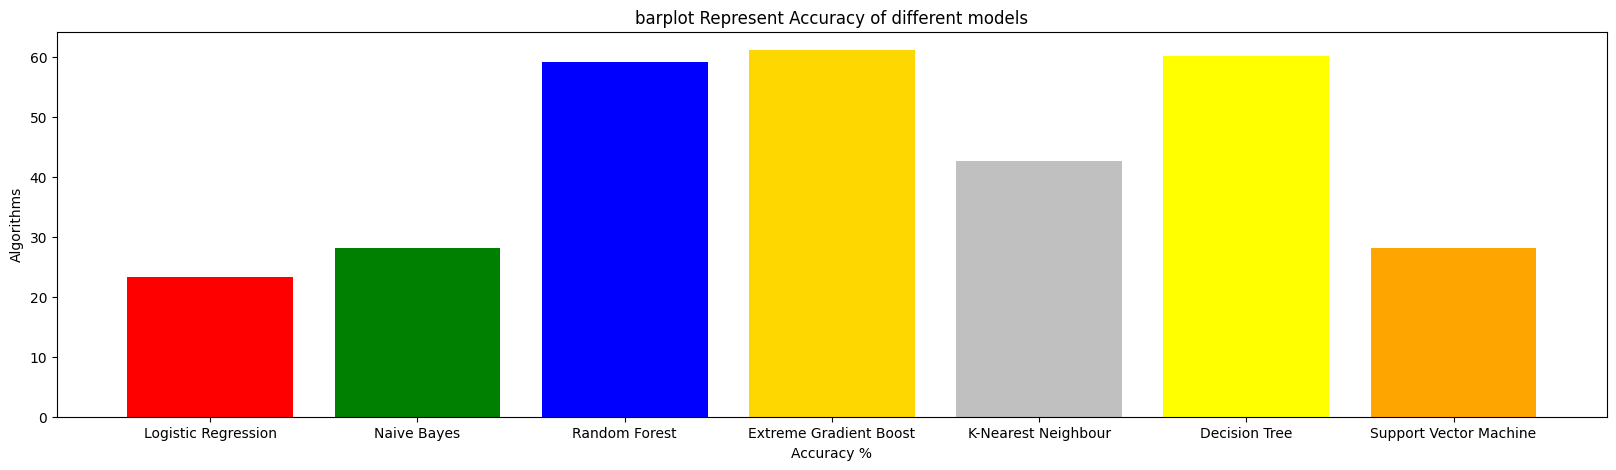

In [32]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(20,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()